# Request for stats from Test and 4 for Jochem


## Email Ticket
### 9 August 2018



Hi Lawrence,

Like we did for test 1&2, we want to calculate the cost per reach for test 3&4. To do so, we are still missing the data for the yellow boxes in the table below (for completeness I have included the data of test 1&2):

|       |    Test 1  |    Test 2    |    Test 3    |    Test 4	
|---    |        --- |  ---         |        ---   |  ---
| **Reach**              |||||
|Consumers targeted |    1630    |	 625       |    1413  	  |    194 |
    |Promotions claimed |	1831	|     728	   |        <div style="background-color:orange">...</div>      |	<div style="background-color:orange">...</div>|
|Promotion reach    |	259	    |    160	   |     358      |	61 | 
|**Costs** 		|||		||
|SMS messages |	2590.74 | 	1391.88	 	|<div style="background-color:orange">...</div>|<div style="background-color:orange">...</div>|
|Airtime	| 4765	 | 5130		|||
|Discounts	| 2475		|||	 <div style="background-color:orange">...</div>|
|Free beer	|		 	 ||<div style="background-color:orange">...</div>|<div style="background-color:orange">...</div>|

Could you help me with 
1.	Filling in the missing data
2.	Verifying the data that is  already there for test 3 & 4

Let me know if you have any questions.

Many thanks,









## Load and Install Libraries

In [69]:
import numpy as np
import pandas as pd
import json
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

from utils import get_prime_conn


%matplotlib inline  

plt.rcParams['figure.figsize']=(12,6)
plt.style.use('ggplot')
from IPython.display import display

In [2]:
conn_dest = get_prime_conn()
engine = create_engine(conn_dest,connect_args={'connect_timeout': 20})
%load_ext sql_magic
%reload_ext sql_magic

%config SQL.output_result = False  # disable browser notifications
%config SQL.notify_result = False  # disable output to std out

# Promotions Claims

In [8]:

promotionID_test3 = '22,23'

promotionID_test4 = '25'

endDate = '2018-08-10'

sms_value_R = 0.18

In [17]:
%%read_sql df_test3_promotions -c engine

SELECT * from PromotionRuleInstance 
where promotionID in ({promotionID_test3})
and activityTimestamp < '{endDate}'

    

Query started at 11:56:06 AM South Africa Standard Time; Query executed in 0.02 m

In [19]:
df_test3_promotions.head().T

,0,1,2,3,4
ID,40413,40415,40417,40418,40419
CreatedTimestamp,2018-07-11 17:01:14,2018-07-11 17:01:35,2018-07-11 17:02:25,2018-07-11 17:02:59,2018-07-11 17:04:15
ActivityTimestamp,2018-07-11 17:01:05,2018-07-11 17:01:28,2018-07-11 17:02:13,2018-07-11 17:02:53,2018-07-11 17:04:02
ActivityDate,2018-07-11,2018-07-11,2018-07-11,2018-07-11,2018-07-11
ActivityTime,17:01:05,17:01:28,17:02:13,17:02:53,17:04:02
TriggerEventTypeNUM,7,7,7,7,7
TriggerEventType,Purchase,Purchase,Purchase,Purchase,Purchase
DeviceID,199,199,199,199,263
TraderID,None,None,None,None,None
OperatorID,None,None,None,None,None


In [23]:
res3 = df_test3_promotions.groupby('PromotionID') \
    .agg({'PromotionRuleCount':'sum', 'AwardAmount':'sum', 'ShopperID':'nunique'})
res3['AwardAmount'] = res3['AwardAmount'] / 100
res3

,PromotionRuleCount,AwardAmount,ShopperID
PromotionID,,,
22,114,2100.0,41
23,254,4360.0,63


In [24]:
# cannot sum unique shopper counts - so reapply aggrgation
res3_a = df_test3_promotions \
    .agg({'PromotionRuleCount':'sum', 'AwardAmount':'sum', 'ShopperID':'nunique'})
res3_a['AwardAmount'] = res3_a['AwardAmount'] / 100
res3_a

PromotionRuleCount     368
AwardAmount           6460
ShopperID              104
dtype: int64

## Test 3 Results

Promotion explanation:

- 22	DDS Test 3A - 1wk Happy Hour
- 23	DDS Test 3B - 3wk Happy Hour


| Metric | Value |
|--------|-------|
|Count of Promotions Issues| 368 |
|Amount(R) | R6460|
|Unique Shoppers claimed| 104|




In [26]:
%%read_sql df_test4_promotions -c engine

SELECT * from PromotionRuleInstance 
where promotionID in ({promotionID_test4})
and activityTimestamp < '{endDate}'


Query started at 12:12:21 PM South Africa Standard Time; Query executed in 0.04 m

## Explanation

PromotionRuleID 
- 50 and 51 are free product
- 52 and 53 are discount rewards

In the result the AwardType is null for discount - so fix

In [27]:
df_test4_promotions['AwardType'].fillna('Discount', inplace=True);

In [28]:
res4 = df_test4_promotions.groupby(['AwardType']).agg({'PromotionRuleCount':'sum', 'AwardAmount':'sum', 'ShopperID':'nunique'})
res4['AwardAmount'] = res4['AwardAmount'] / 100
res4


,PromotionRuleCount,AwardAmount,ShopperID
AwardType,,,
Discount,190,950.0,35
FreeProduct,135,2025.0,72


In [29]:
res4 = df_test4_promotions.agg({'PromotionRuleCount':'sum', 'AwardAmount':'sum', 'ShopperID':'nunique'})
res4['AwardAmount'] = res4['AwardAmount'] / 100
res4


PromotionRuleCount     325
AwardAmount           2975
ShopperID               87
dtype: int64

## Test 4 Results


Promotion 4 explanation:

PromotionRules
- 50		DDS Test 4A 2 - Brand Switch wk2
- 51		DDS Test 4A 1 - Brand Switch wk1 
- 52		DDS Test 4B 1 - Brand Switch2 wk1 
- 53		DDS Test 4B 2 - Brand Switch2 wk2 


| Metric | Value |
|--------|-------|
|Count | 325.0 |
|Amount(R) | R2975.00|
|Unique shoppers | 87|




In [154]:
%%read_sql df_sms -c engine


select *
from bulksmsinstance
where bulksmsbatchname like 'T%' or bulksmsbatchname like 'T3%'
and smsCreatedDate < '{endDate}'


Query started at 01:36:19 PM South Africa Standard Time; Query executed in 0.47 m

In [155]:
df_sms['group'] = df_sms['BulkSmsBatchName'].str.extract('^(.*)/', expand=True)
df_sms['messageCount'] = np.ceil(df_sms['PayloadSummary'].str.len()/160.0)



# SMS Results

In [156]:
sms = df_sms.groupby('group').agg({'ID':'count', 'messageCount':'sum', 'ShopperID':'nunique'})
    

sms['R'] = sms.messageCount * sms_value_R

sms

,ID,messageCount,ShopperID,R
group,,,,
T1,8362,13127.0,1677,2362.86
T2,2626,5671.0,667,1020.78
T3,7574,10429.0,1478,1877.22
T4,2673,5005.0,376,900.90


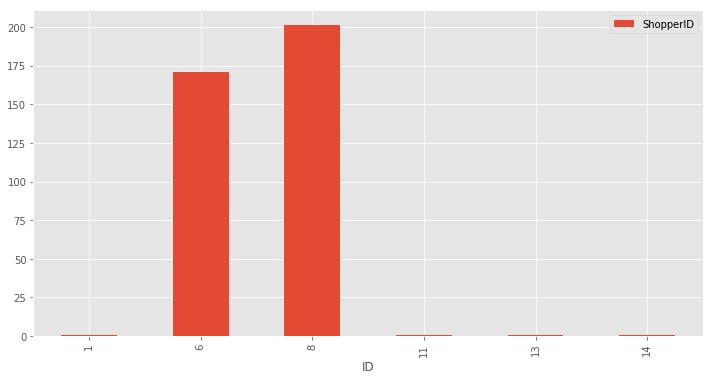

In [157]:
df_sms[df_sms['group']=='T4'].groupby(['ShopperID'])['ID'].count().reset_index().groupby('ID').count().plot.bar()

In [171]:
#get frequesncies of sms
s = df_sms.groupby(['group','ShopperID'])['ID'].count().reset_index()

#get size of groups
s.groupby(['ID','group']).size();

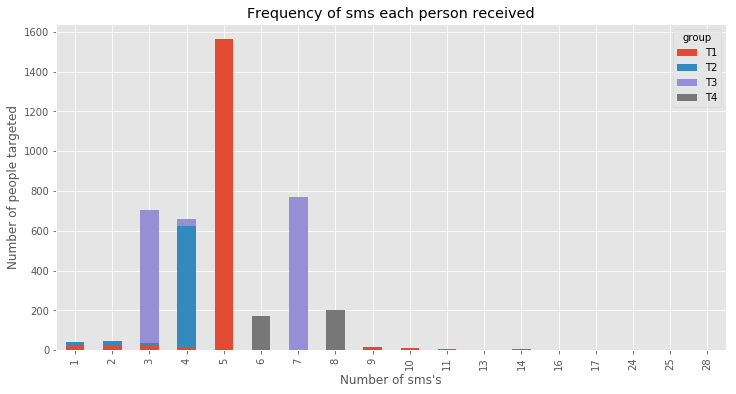

In [173]:
s.groupby(['ID','group']).size().unstack().plot(kind='bar', stacked=True);
plt.xlabel('Number of sms\'s')
plt.ylabel('Number of people targeted')
plt.title('Frequency of sms each person received');

In [161]:
s.groupby(['group','ID']).size().unstack()

ID,1,2,3,4,5,6,7,8,9,10,11,13,14,16,17,24,25,28
group,,,,,,,,,,,,,,,,,,
T1,26.0,24.0,23.0,9.0,1562.0,1.0,NaN,1.0,13.0,9.0,4.0,NaN,2.0,NaN,NaN,1.0,NaN,2.0
T2,13.0,22.0,14.0,613.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
T3,NaN,NaN,669.0,36.0,NaN,NaN,769.0,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
T4,1.0,NaN,NaN,NaN,NaN,171.0,NaN,201.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN


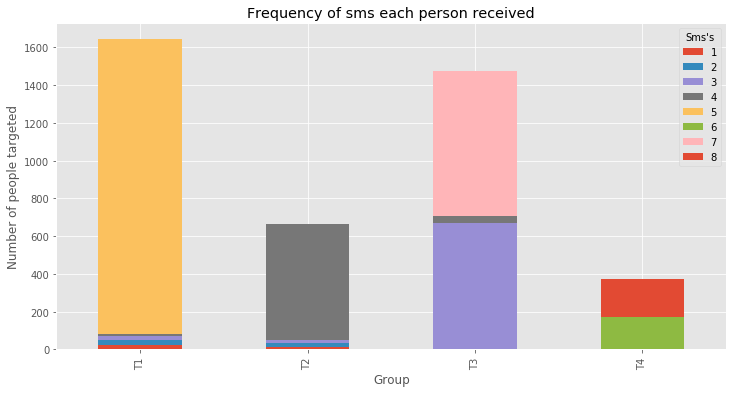

In [178]:
#lets only plot <10 sms's

s[s.ID < 9].groupby(['group','ID']).size().unstack().plot.bar(stacked=True)
plt.xlabel('Group')
plt.ylabel('Number of people targeted')
plt.legend(title='Sms\'s')
plt.title('Frequency of sms each person received');